In [3]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg  

# 벡터와 행렬의 연산

## 벡터/행렬의 덧셈과 뺄셈
- 같은 크기를 가진 두 개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있다

In [33]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

In [34]:
x+y

array([10, 12, 14, 16, 18])

In [35]:
x-y

array([10, 10, 10, 10, 10])

In [36]:
np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])

## 보로드케스팅(broadcasting)
- 벡터와 스칼라 연산한 경우에는 1벡터를 사용해 스찰라를 벡터로 변환시킴 

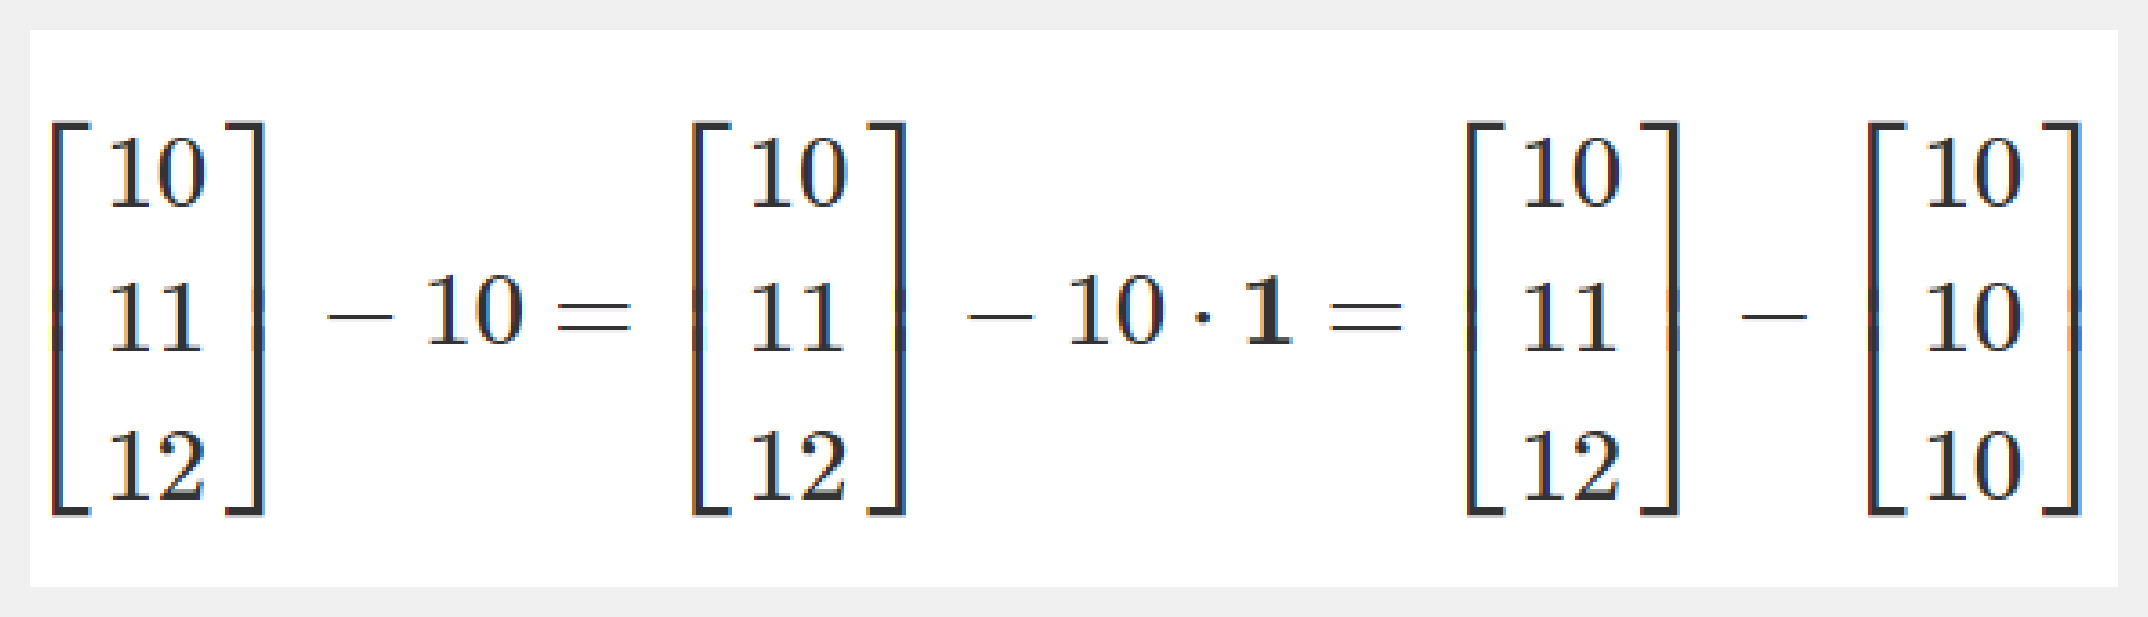

In [37]:
# 이미지 출력
lena = mpimg.imread('./broadcasting.png')
lena.shape
plt.imshow(lena)
plt.axis('off')
plt.show()

- 평균제거벡터(mean removed) / 0평균벡터(zero-mean)
    - 데이터 분석에서는 각 원소의 평균값을 뺴고 사용하는 경우가 많음

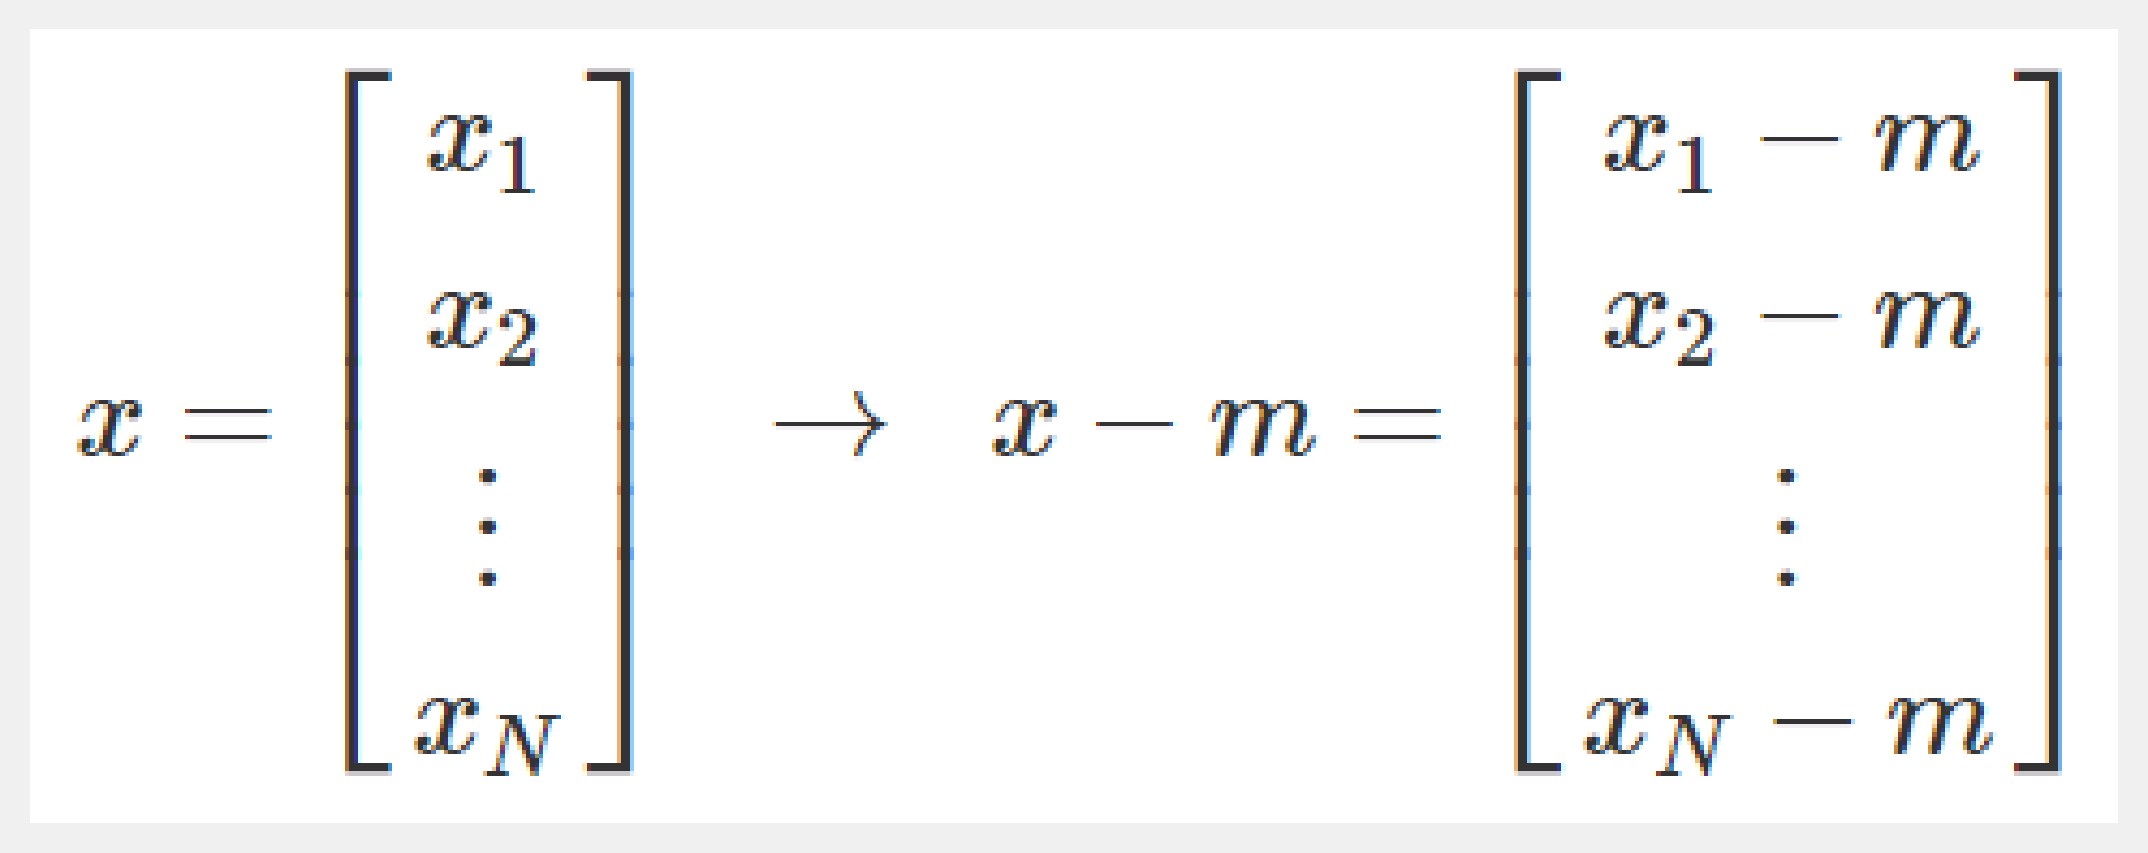

In [38]:
# 이미지 출력
lena = mpimg.imread('./mean removed.png')
lena.shape
plt.imshow(lena)
plt.axis('off')
plt.show()

## 선형조합(linear combination)

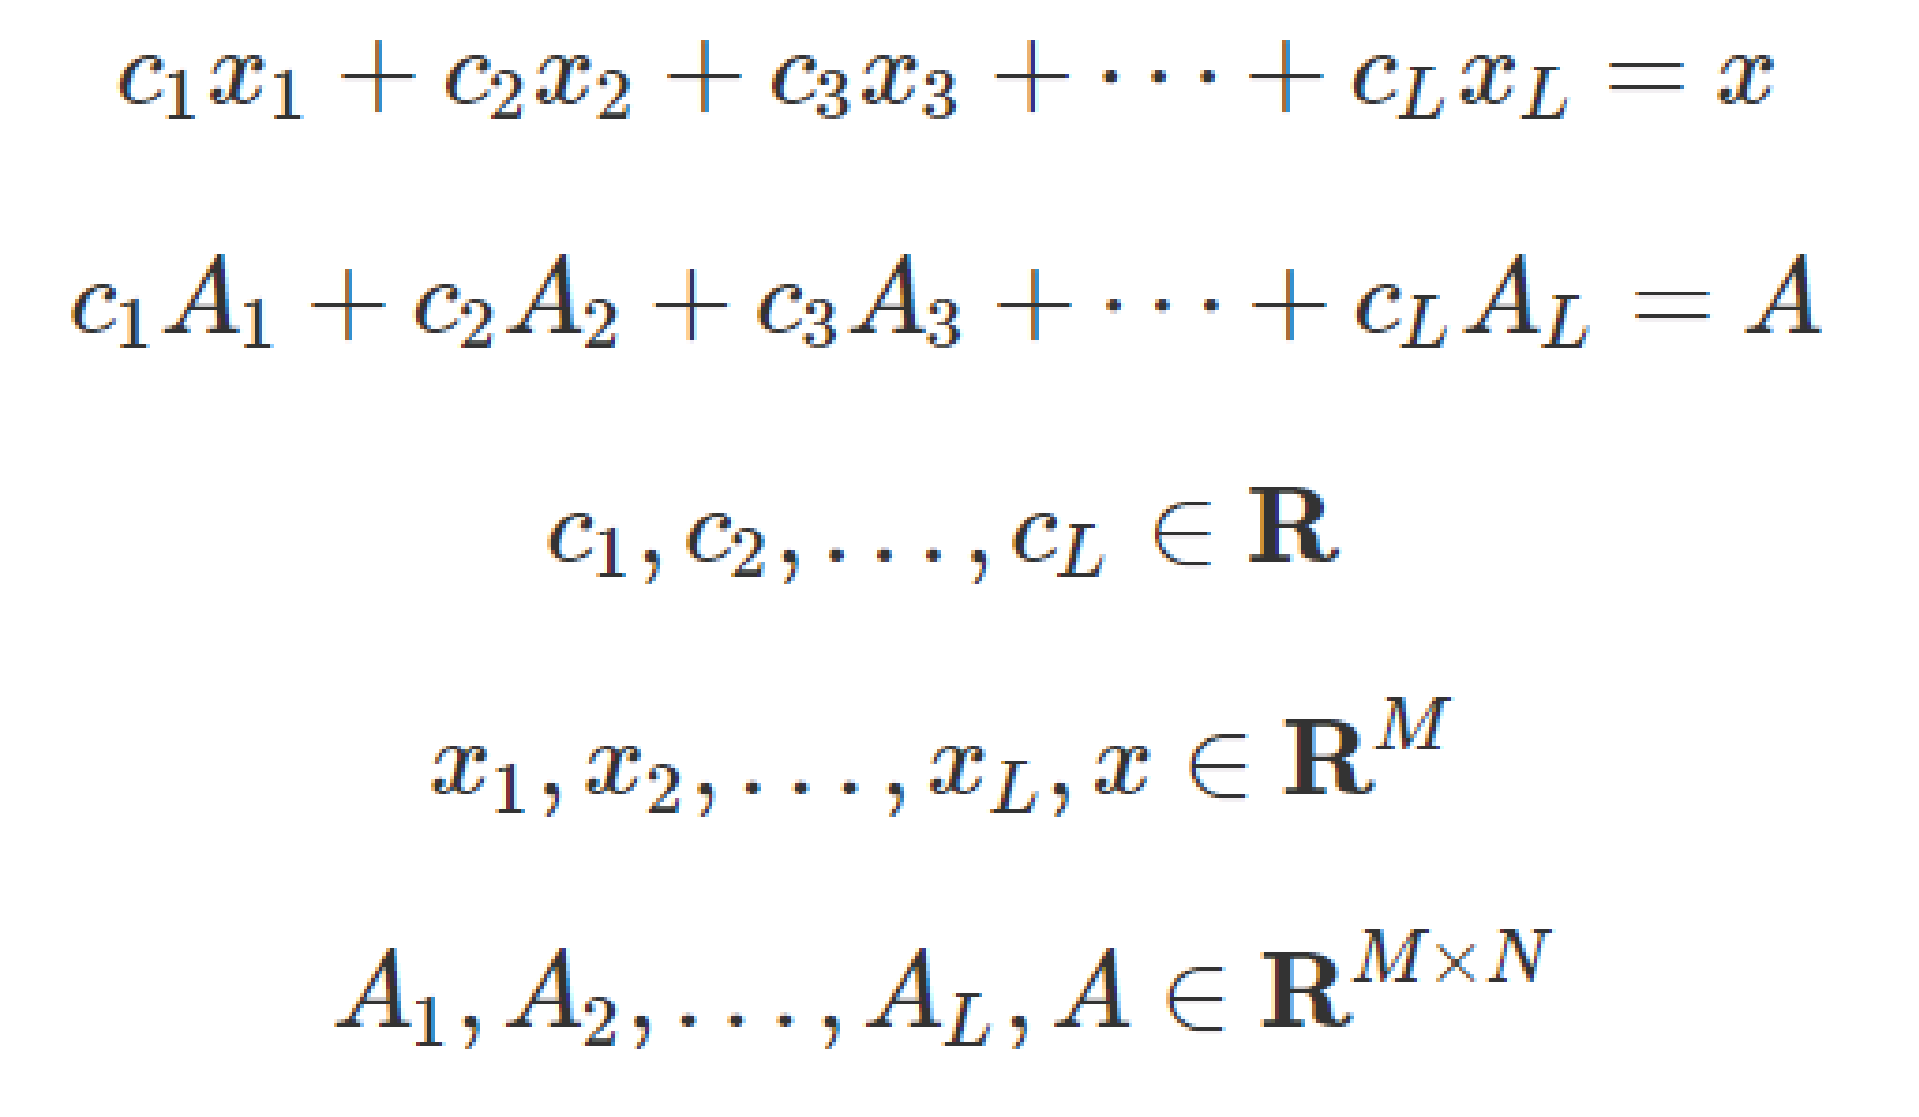

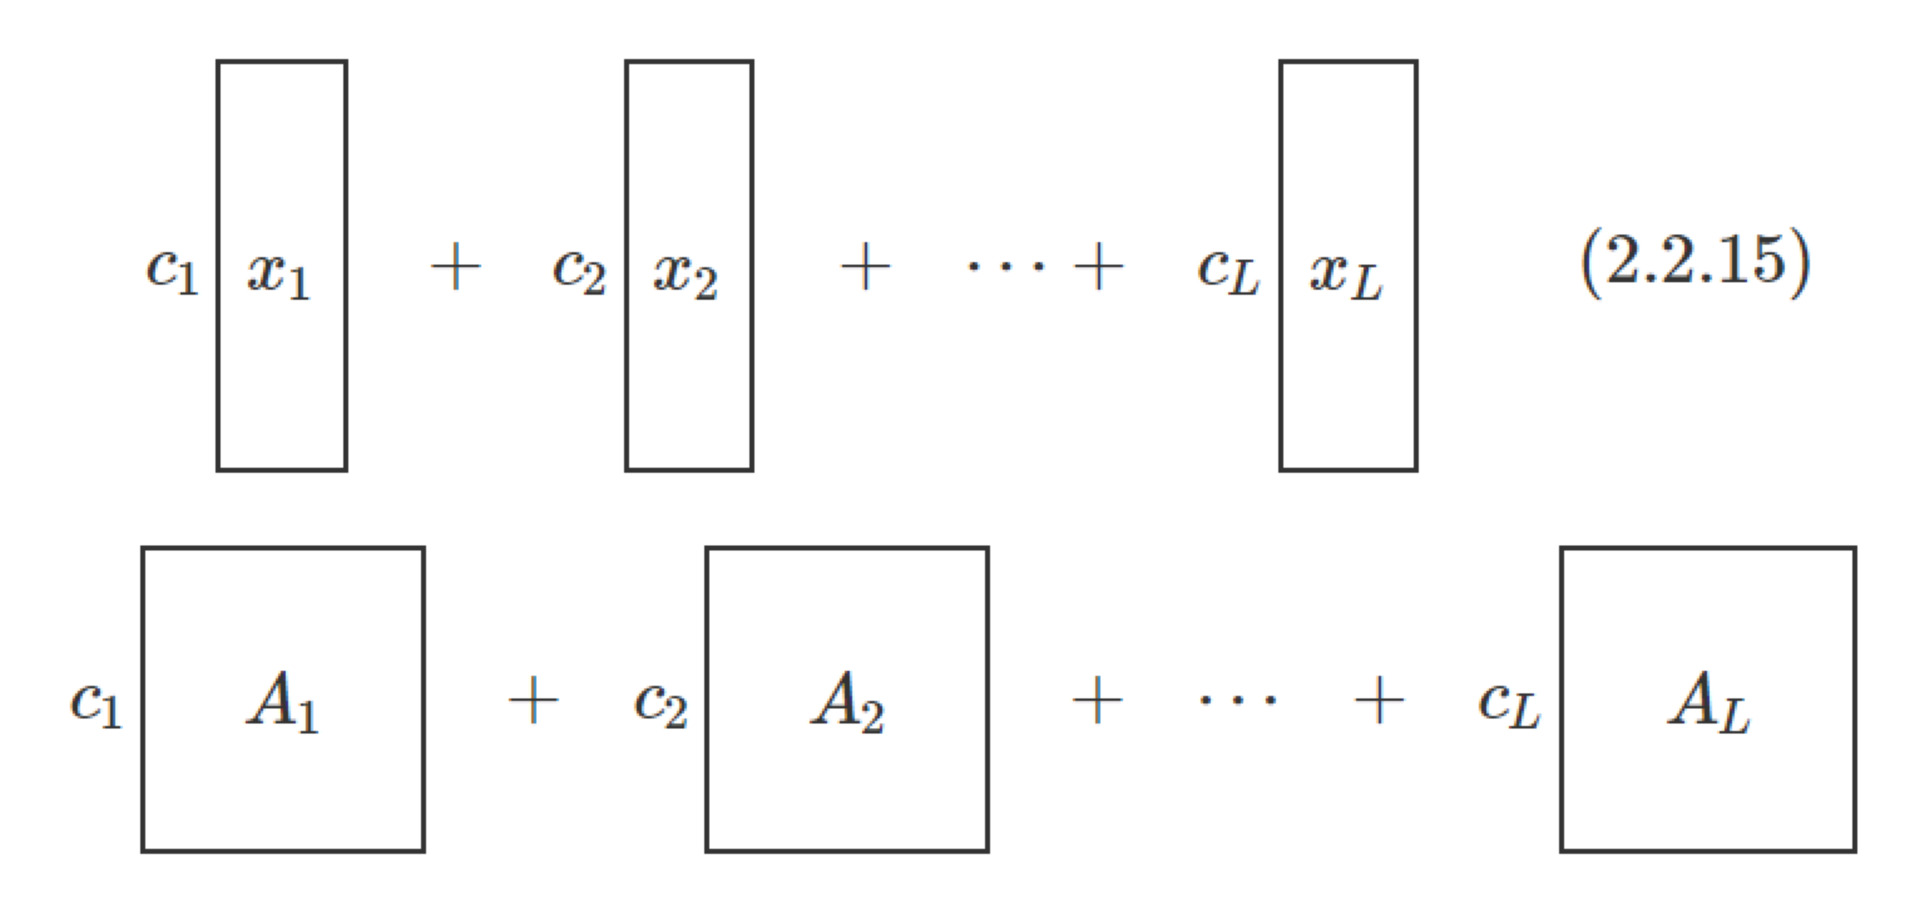

In [5]:
lena = mpimg.imread('./linear combination.png') 
lena1 = mpimg.imread('./linear combination_1.png')
lena.shape
plt.imshow(lena)
plt.axis('off')
plt.show()

lena1.shape
plt.imshow(lena1)
plt.axis('off')
plt.show()

## 벡터와 벡터의 곱셈
- 우선 두 벡터의 차원(길이)이 같아야 함
- 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터여야 함

In [40]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

x.T @ y  # 곱셈
# np.dot(x.T, y) # 결과 같음

array([[32]])

In [41]:
x[1]

array([2])

In [42]:
(x.T @ y)[0][0]

32

In [43]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x @ y  # 1차원이기 때문에 전치 연산할 필요없음
# np.dot(x, y) # 결과 같음

32

## 가중합(weighted sum)

연습문제:

A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.


(1) 주식의 가격과 수량을 각각  p  벡터,  n  벡터로 표시하고 넘파이로 코딩한다.

(2) 주식을 매수할 때 필요한 금액을 곱셈으로 표시하고 넘파이 연산으로 그 값을 계산한다.

In [44]:
#(1)
p = np.array([100,80,50])
n = np.array([3,4,5])

In [45]:
#(2)
n @ p.T

870

## 가중평균(weighted average)
- 가중합의 가중치값을 전체 가중치값의 합으로 나눔
- 가중평균은 대학교의 평균 성적 계산 등에 사용할 수 있다

In [46]:
x = np.arange(10)
N = len(x)

x.mean() #더 많이 쓰임
#np.ones(N) @ x / N

4.5

In [47]:
x.mean()

4.5

## 유사도(Similarity)
- 두 벡터가 닮은 정도를 정량적으로 나타낸 값임
    - 두 벡터가 비슷한 경우에는 유사도가 커짐
    - 두 벡터가 비슷하지 앟은 경우에는 유사도가 작아짐

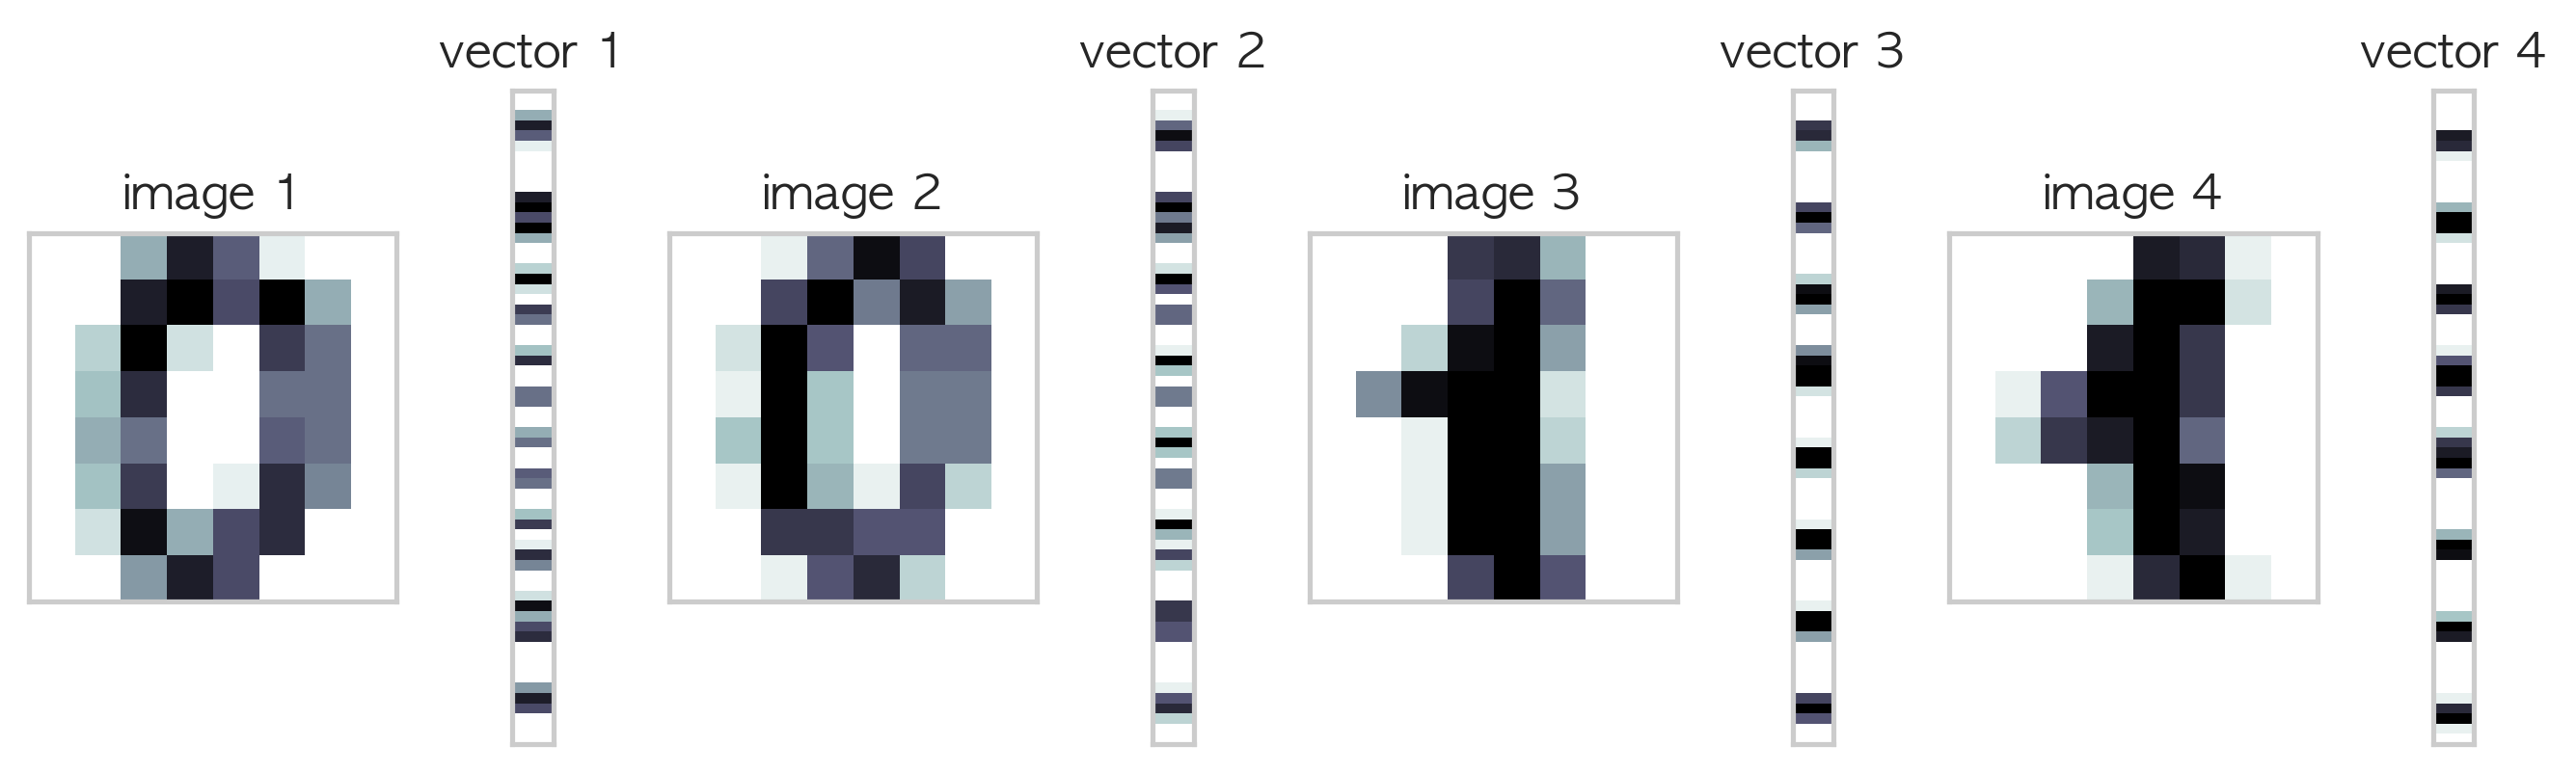

In [4]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [15]:
# "0"와 "0"또는 "1"와 "1"
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [50]:
# "0"와 "1" 또는 "1"와 "0"
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0] #"0" 이미지와 "1" 이미지, 또는 "1" 이미지와 "0"이미지의 내적값은 작다.

(1866.0, 1883.0, 2421.0, 2479.0)

"0" 이미지와 "0" 이미지, 또는 "1" 이미지와 "1" 이미지의 내적값은 크고, 상대적으로 "0" 이미지와 "1" 이미지, 또는 "1" 이미지와 "0" 이미지의 내적값은 작다. 

**연습 문제2.2.3:**

다음 코드를 실행하면 MNIST 숫자 이미지 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 X를 만든다. 이 행렬을 이용하여 다음 문제를 풀어라.
```
from sklearn.datasets import load_digits
X = load_digits().data
```

(1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

(2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까? (힌트 : 이 문제는 뒤에서 배울 행렬과 행렬의 곱셈을 이용한다.)

In [16]:
from sklearn.datasets import load_digits
X = load_digits().data

# (1)
X[0].T @ X[9]

2807.0

In [17]:
x = X @ X.T
len(x)
# for i in range(0,len(X)-1):
#    X[i].T @ X[i+1]
# len(X)
x.shape

(1797, 1797)

## 선형회귀 모형
예시:
- 면적( m2 )을 입력 데이터  x1 라고 한다.
- 층수를 입력 데이터  x2 라고 한다
- 한강이 보이는지의 여부를 입력 데이터  x3 라고 하며 한강이 보이면  x3=1 , 보이지 않으면  x3=0 이라고 한다.

출력 데이터  y^ 는 해당 아파트의 예측 가격이다.
위와 같이 입력 데이터와 출력 데이터를 정의하고 회귀분석을 한 결과, 아파트값이 다음과 같은 선형회귀 모형으로 나타난다고 가정하자. 이러한 모형을 실제로 찾는 방법은 나중에 회귀분석 파트에서 공부하게 된다.

**y^=500x1+200x2+1000x3**
**이 모형은 다음과 같이 해석할 수 있다.**

- 면적이 1 m2  증가할수록 가격은 500만 원이 증가한다.
- 층수가 1층 높아질수록 가격은 200만 원이 증가한다.
- 한강이 보이는 집은 1,000만 원의 웃돈(프리미엄)이 존재한다.
위 식은 다음과 같이 벡터의 내적으로 고쳐 쓸 수 있다.

## 제곱합(sum of squares)
- 데이터의 분산(variance)이나 표준 편차(standard deviation) 등을 구하는 경우에는 각각의 데이터를 제곱한 뒤 이 값을 모두 더한 제곱합(sum of squares)을 계산해야 한다. 
    - **x^T·x**

## 행렬과 행렬의 곱셈
- 앞에 있는 행렬 열의 수가 뒤에 있는 행렬 행의 수과 같아야 됨

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

In [19]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
A = np.array([[1, 2, 3]])
B = np.array([[4, 7], [5, 8], [6, 9]])
A @ B

array([[32, 50]])

In [21]:
A = np.array([[1,2],[3,4]])
B = np.array([[5, 6],[7, 8]])
print(A @ B)
print(B @ A)

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [22]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.T @ A)
print(A @ A.T)

[[35 44]
 [44 56]]
[[ 5 11 17]
 [11 25 39]
 [17 39 61]]


In [23]:
x = np.array([[1],[2],[3]])
print(x.T @ x)
print(x @ x.T)

[[14]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


## 교환 법칙과 분배 법칙
행렬의 곱셈은 곱하는 행렬의 순서를 바꾸는 교환 법칙이 성립하지 않는다. 그러나 덧셈에 대한 분배 법칙은 성립한다.

**AB≠BA**

**A(B+C)=AB+AC**

**(A+B)C=AC+BC**

In [24]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

In [25]:
print(A @ B)
print(B @ A)
print(A @ (B + C))
print(A @ B + A @ C)
print((A + B) @ C)
print(A @ C + B @ C)

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]
[[42 42]
 [98 98]]
[[42 42]
 [98 98]]
[[110  96]
 [174 152]]
[[110  96]
 [174 152]]


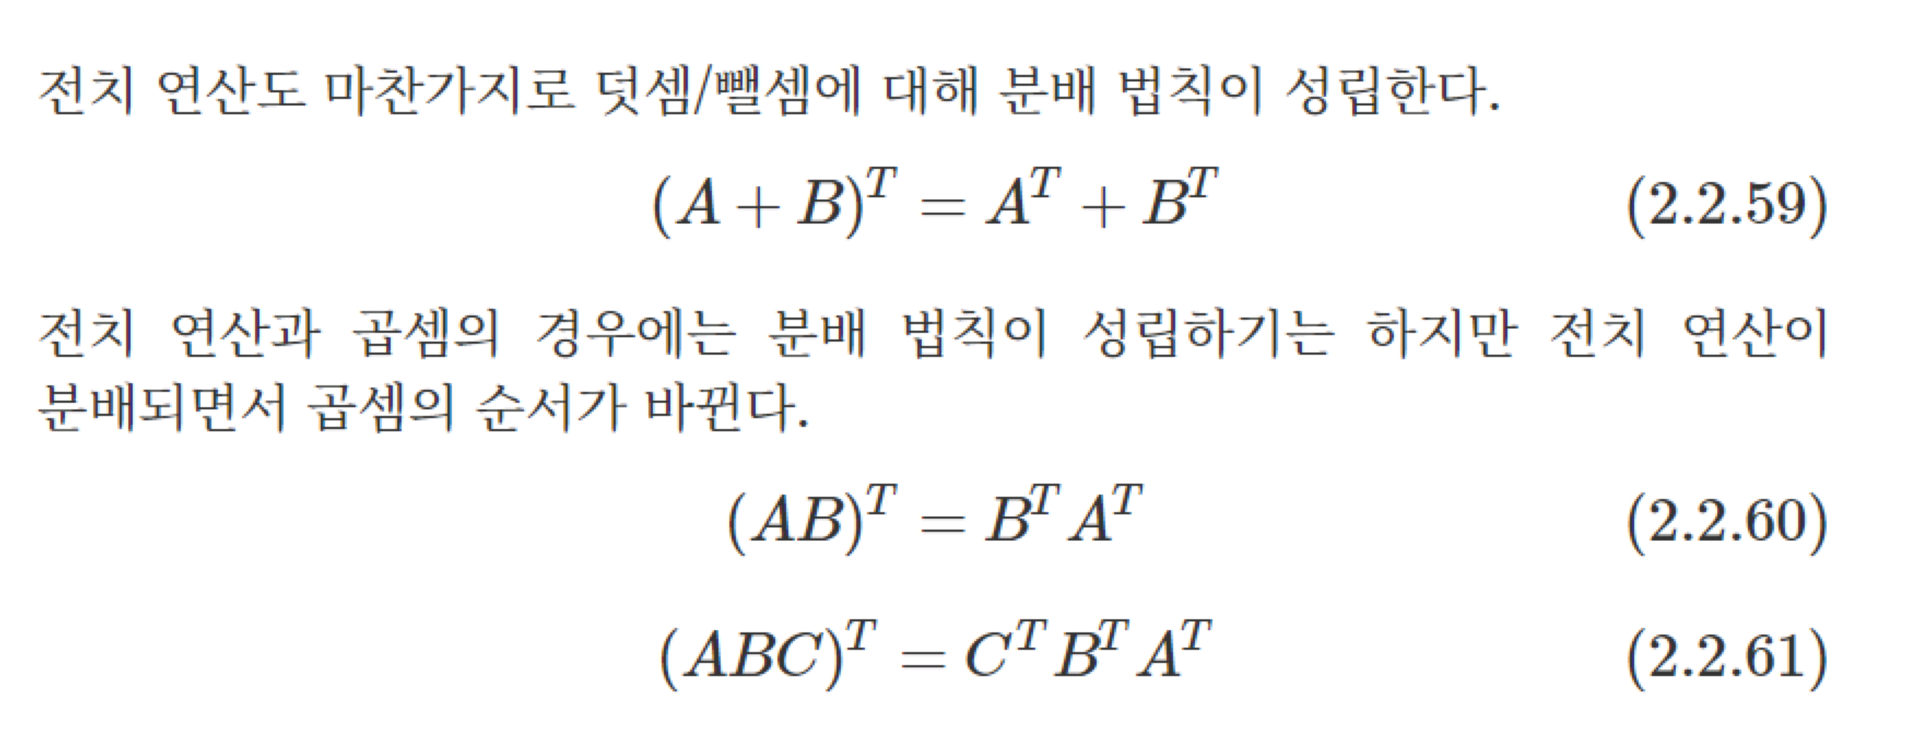

In [26]:
lena = mpimg.imread('./1.png')
lena.shape
plt.imshow(lena)
plt.axis('off')
plt.show()

In [27]:
print((A + B).T)
print(A.T + B.T)
print((A @ B).T)
print(B.T @ A.T)
print((A@B@C).T)
print(C.T @ B.T @ A.T)

[[ 6 10]
 [ 8 12]]
[[ 6 10]
 [ 8 12]]
[[19 43]
 [22 50]]
[[19 43]
 [22 50]]
[[325 737]
 [284 644]]
[[325 737]
 [284 644]]


In [5]:
np.shape(A)

(2, 3)

In [9]:
len(B)

3

In [11]:
B.ndim

2

- np.shape()함수를 통해 행렬 행의 수와 열의 수를 확인 가능
- len()함수는 행렬 행의 수를 출력 가능
- x.ndim함수는 행렬 차원의 수를 출력 가능

In [28]:
x = np.ones((3, 3, 3))
print(x)
x.ndim

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


3

연습문제 2.2.5

(4) 다음 코드를 실행하면 붓꽃 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 X 를 만든다.
```
from sklearn.datasets import load_iris
X = load_iris().data
```
이 데이터로 행렬  X¯ 의 값을 계산하라. 이 행렬은 첫 번째 열의 값이 모두 같은 값으로 붓꽃의 꽃받침의 길이(sepal length)의 평균이고 두 번째 열의 값이 모두 같은 값으로 붓꽃의 꽃받침의 폭(sepal width)의 평균, 이런 식으로 계산된 행렬이다.

In [29]:
from sklearn.datasets import load_iris
X = load_iris().data

In [30]:
((np.ones((len(X),1)) @ (np.ones((len(X),1)).T @ X))/len(X))[:5]

array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333]])

In [156]:
np.ones(N).reshape(-1,1) # -1랜덤으로 선정할 수 있지만 열은 무조건 1로 지정해야 함

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## 곱셈의 연결
**ABC=(AB)C=A(BC)**

**ABCD=((AB)C)D=(AB)(CD)=A(BCD)=A(BC)D**

In [157]:
A = np.array([[1, 2]])
B = np.array([[1, 2], [3, 4]])
C = np.array([[5],[6]])

In [158]:
A @ B @ C

array([[95]])

## 항등행렬의 곱셈

In [159]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)
print(A @ I)
print(I @ A)

[[1. 2.]
 [3. 4.]]
[[1. 2.]
 [3. 4.]]


## 행렬과 벡터의 곱

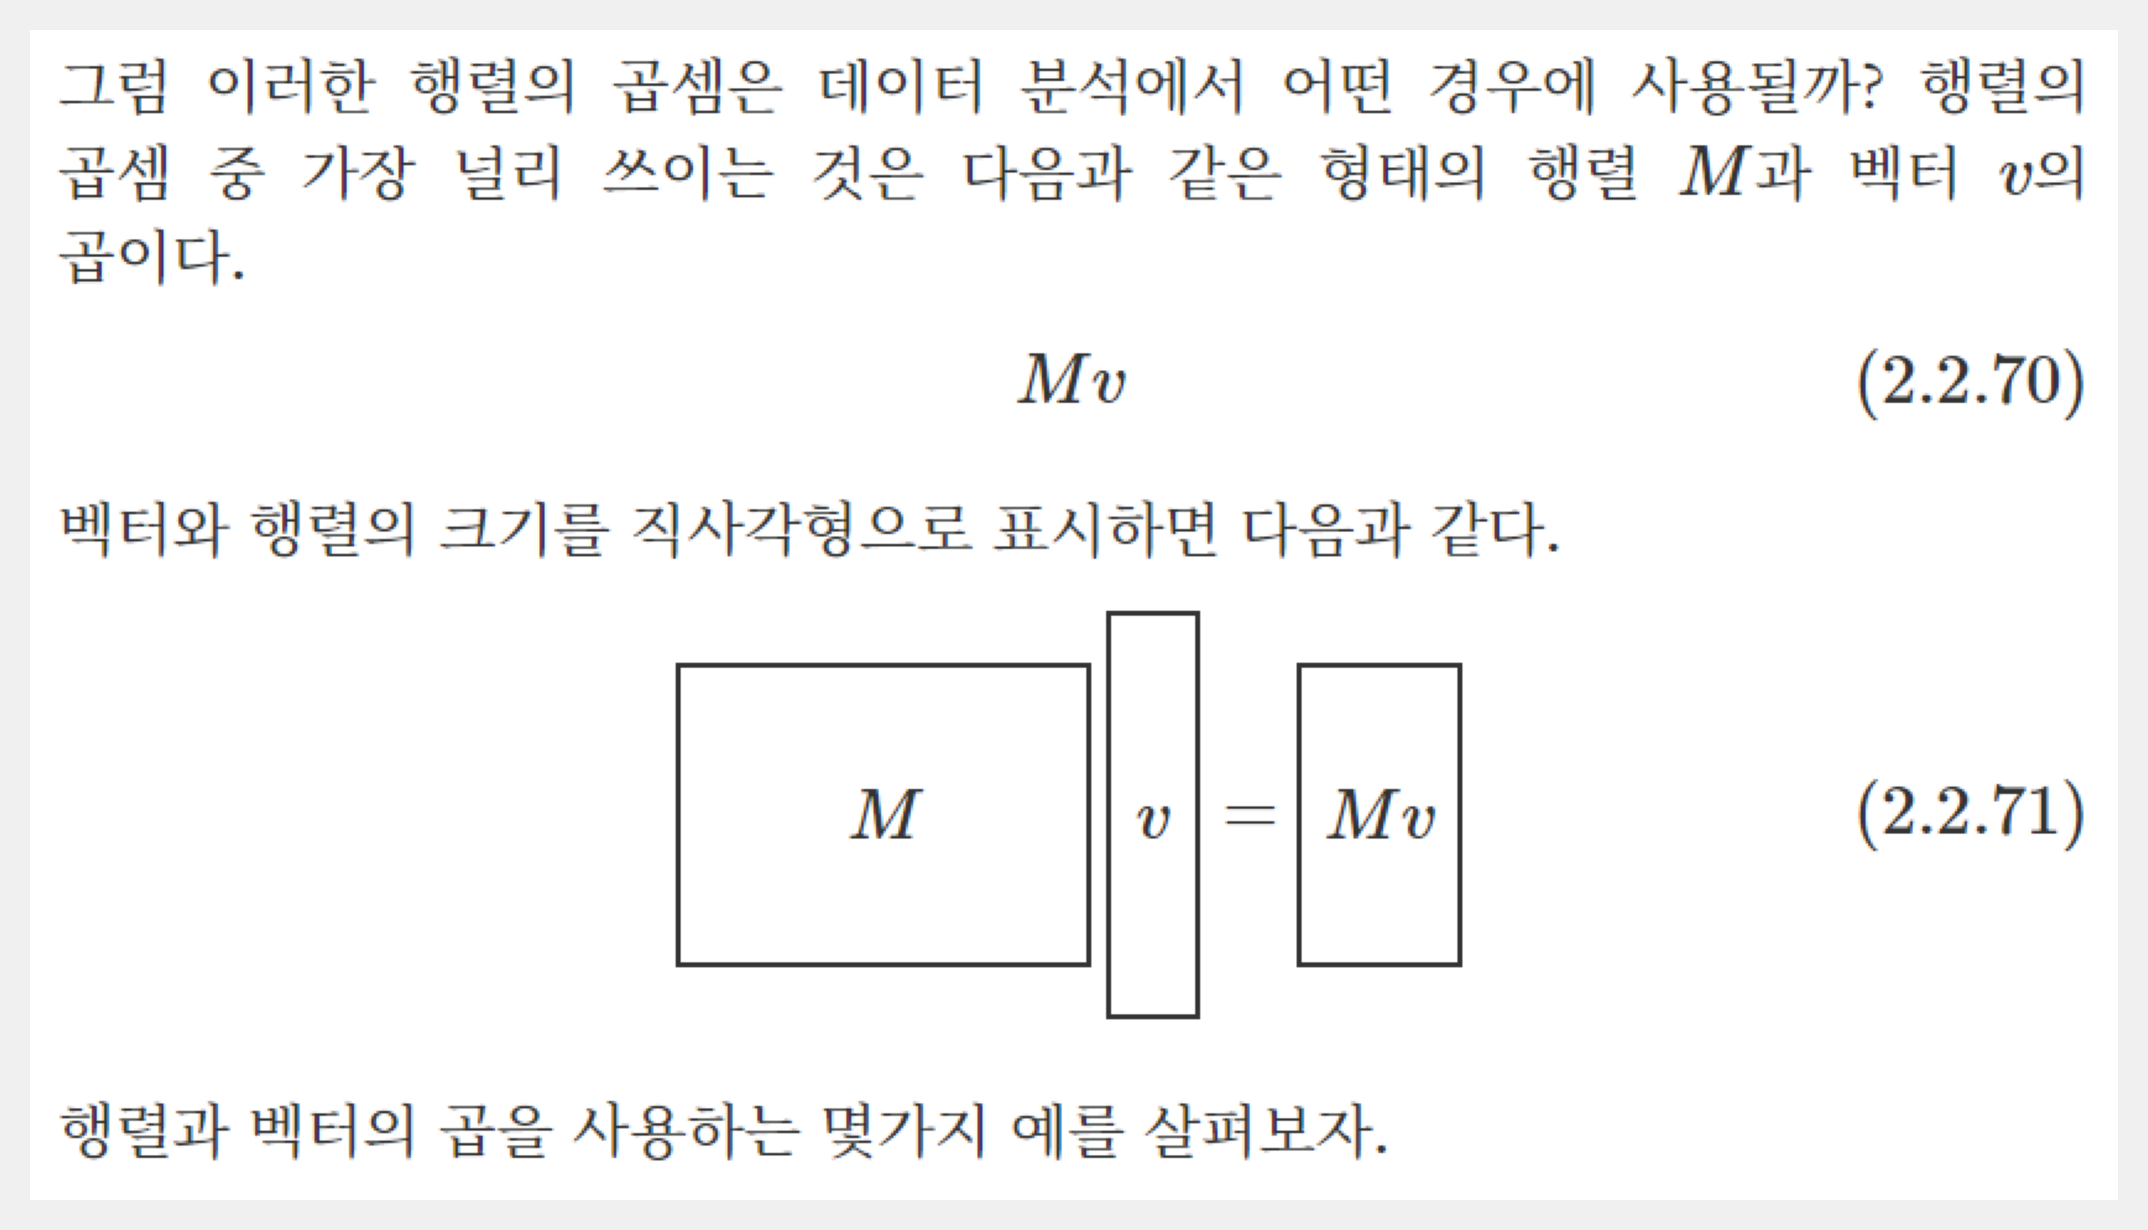

In [160]:
lena = mpimg.imread('./행열과 벡터.png')
lena.shape
plt.imshow(lena) # 사진 출력
plt.axis('off') # 좌표 안 나오게 설정
plt.show()

## 열 벡터의 선형조합

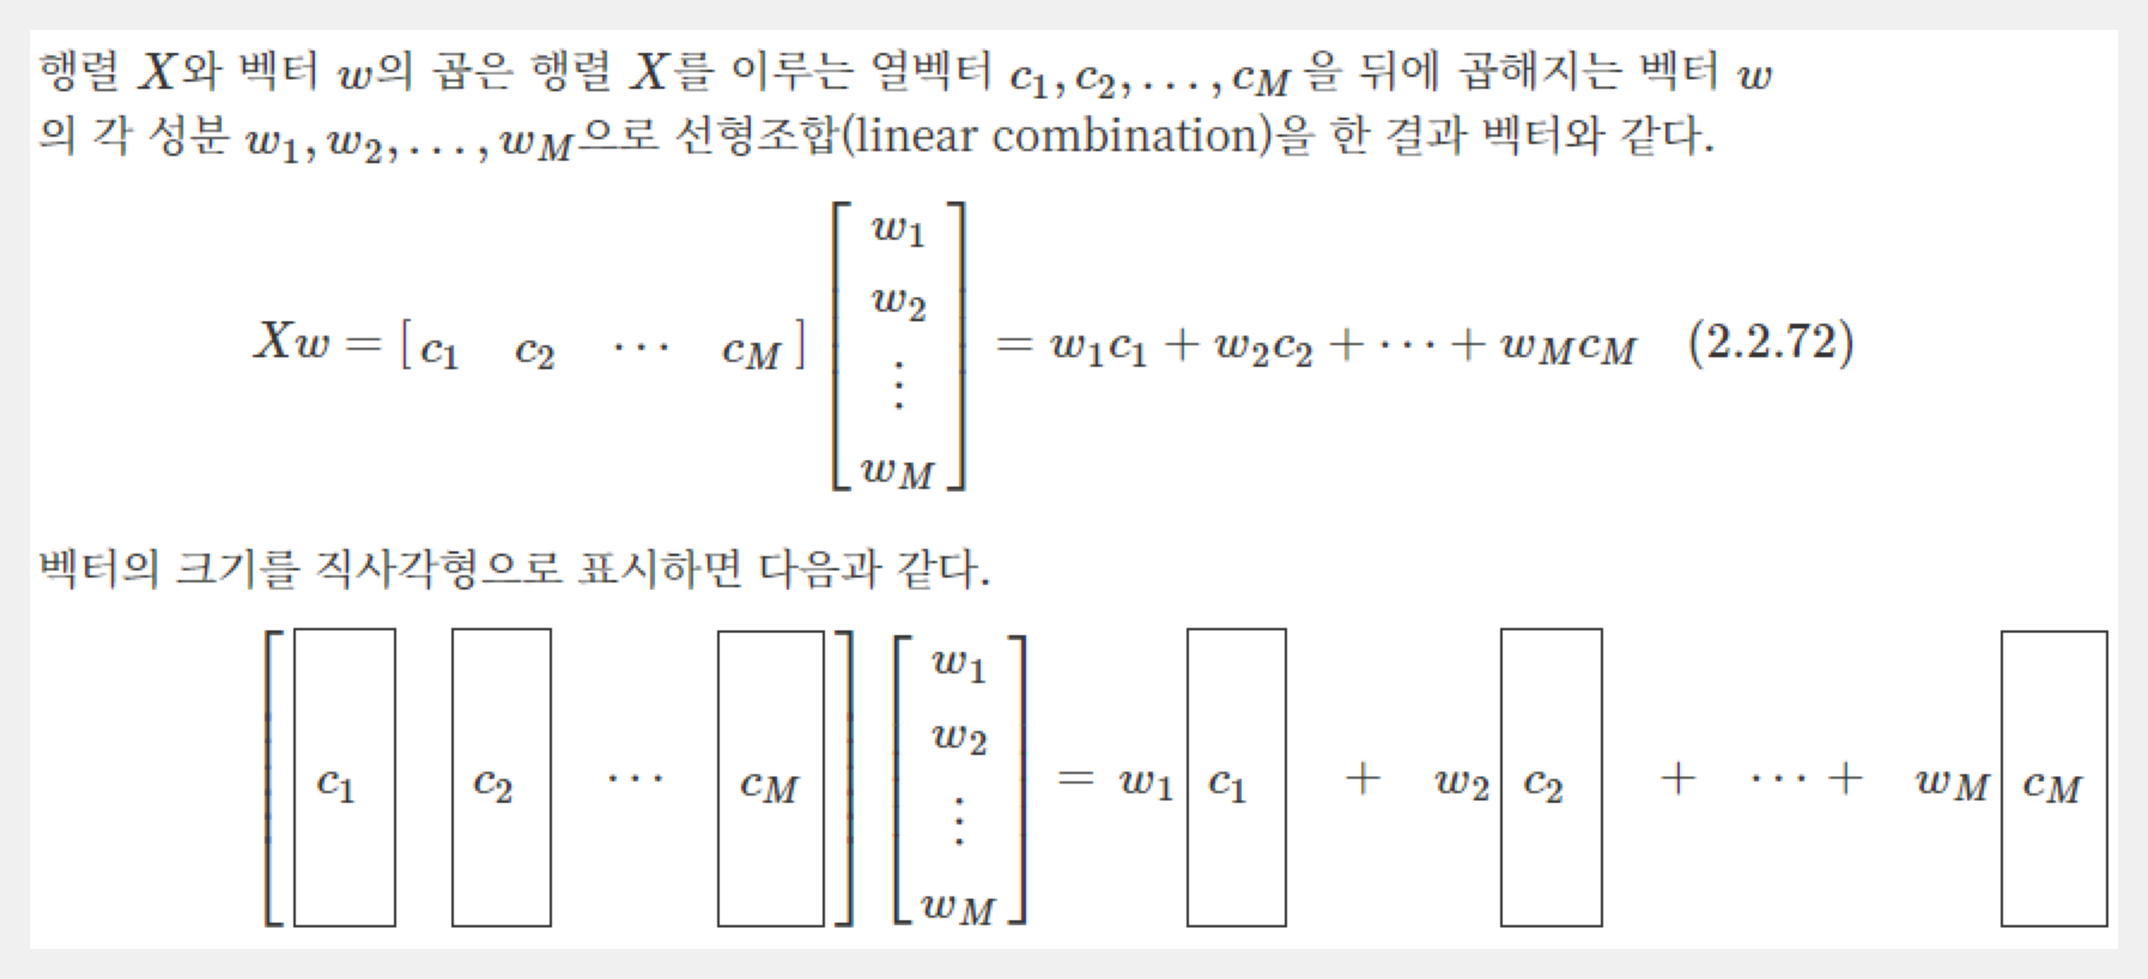

In [161]:
lena = mpimg.imread('./열벡터 선형조합.png')
lena.shape
plt.imshow(lena) # 사진 출력
plt.axis('off') # 좌표 안 나오게 설정
plt.show()

연습문제2.2.7:

다음 행렬  X 와 벡터  w 에 대해 곱  Xw 가 열벡터  c1,c2,c3 의 선형조합  w1c1+w2c2+w3c3 가 됨을 실제 계산으로 증명하라.

In [162]:
A = np.array([[1, 2, 3], [4, 5, 6]])
w = np.array([[2],[3],[4]])

In [163]:
A @ w

array([[20],
       [47]])

In [164]:
A[:, 0:1]  # X[:,0]의 결과는 숫자이고，X[:,0:1]는 array형식을 유지할 수 있음

array([[1],
       [4]])

In [165]:
w[0] * A[:,0:1] + w[1] * A[:,1:2] + w[2] * A[:,2:3]

array([[20],
       [47]])

#### 벡터의 선형조합의 응용
- 두 이미지를 섞어놓은 모핑(morphing) 효과를 얻는 데 사용 가능

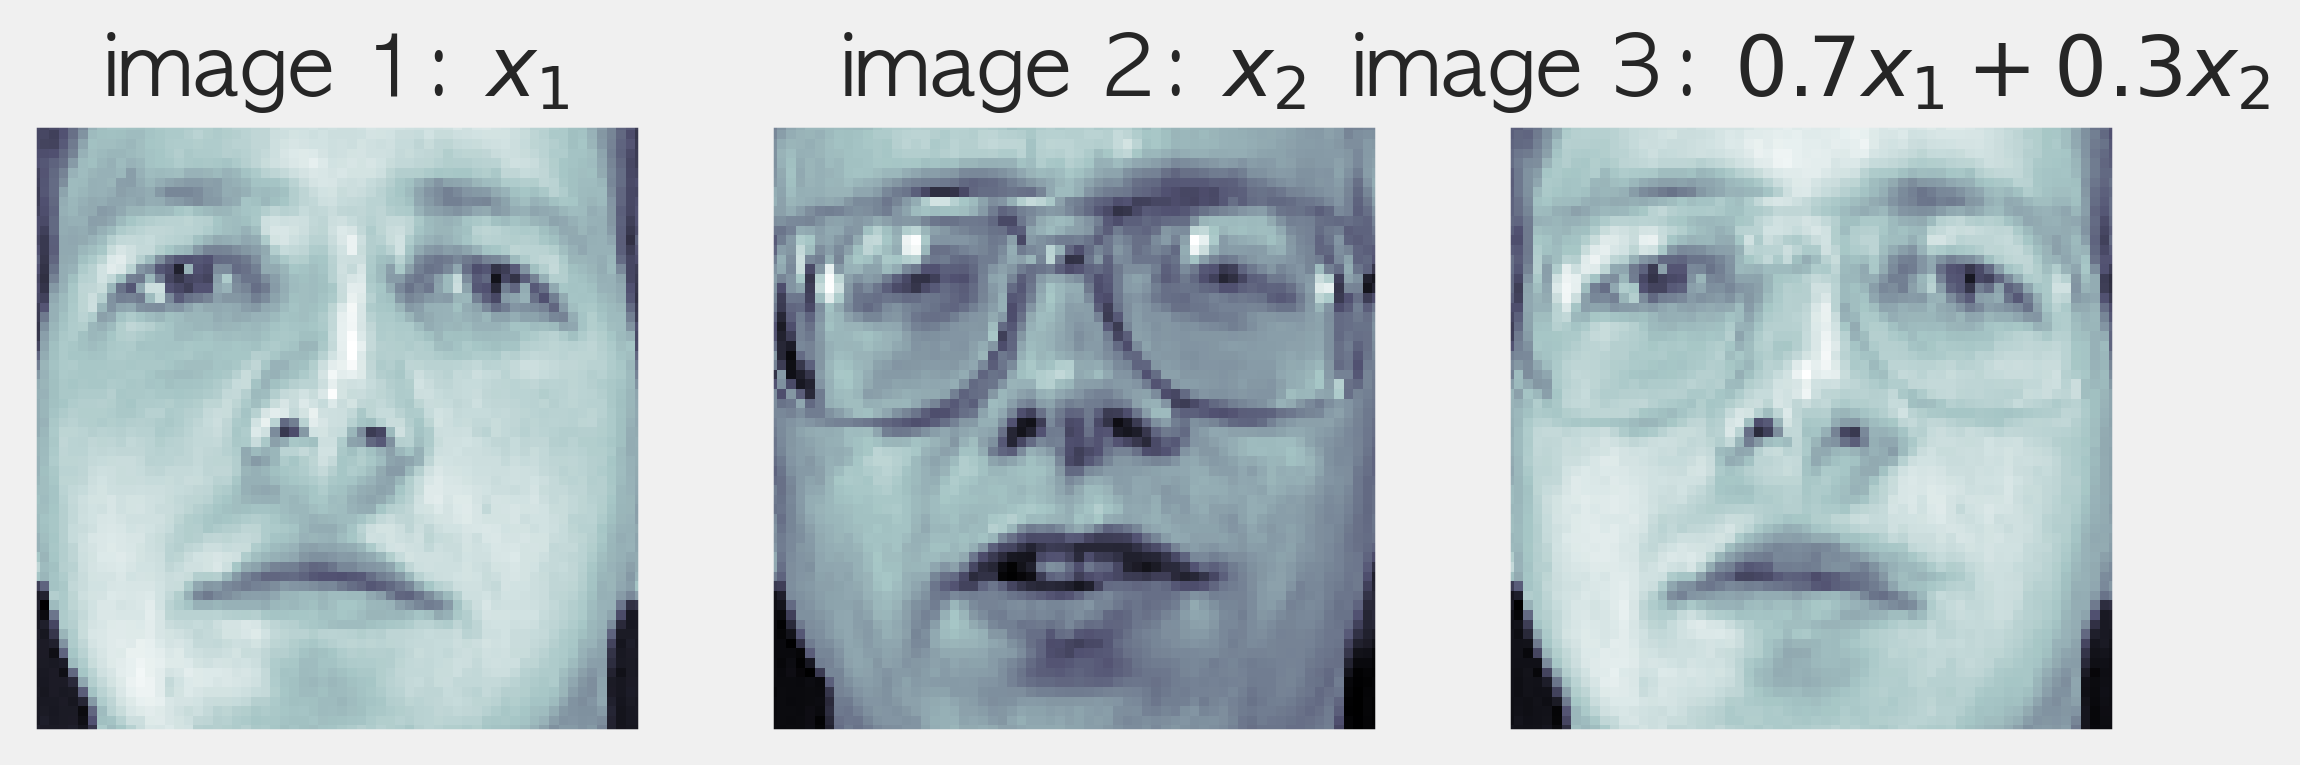

In [168]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")
plt.show()

## 여러 개의 벡터에 대한 가중합 동시 계산

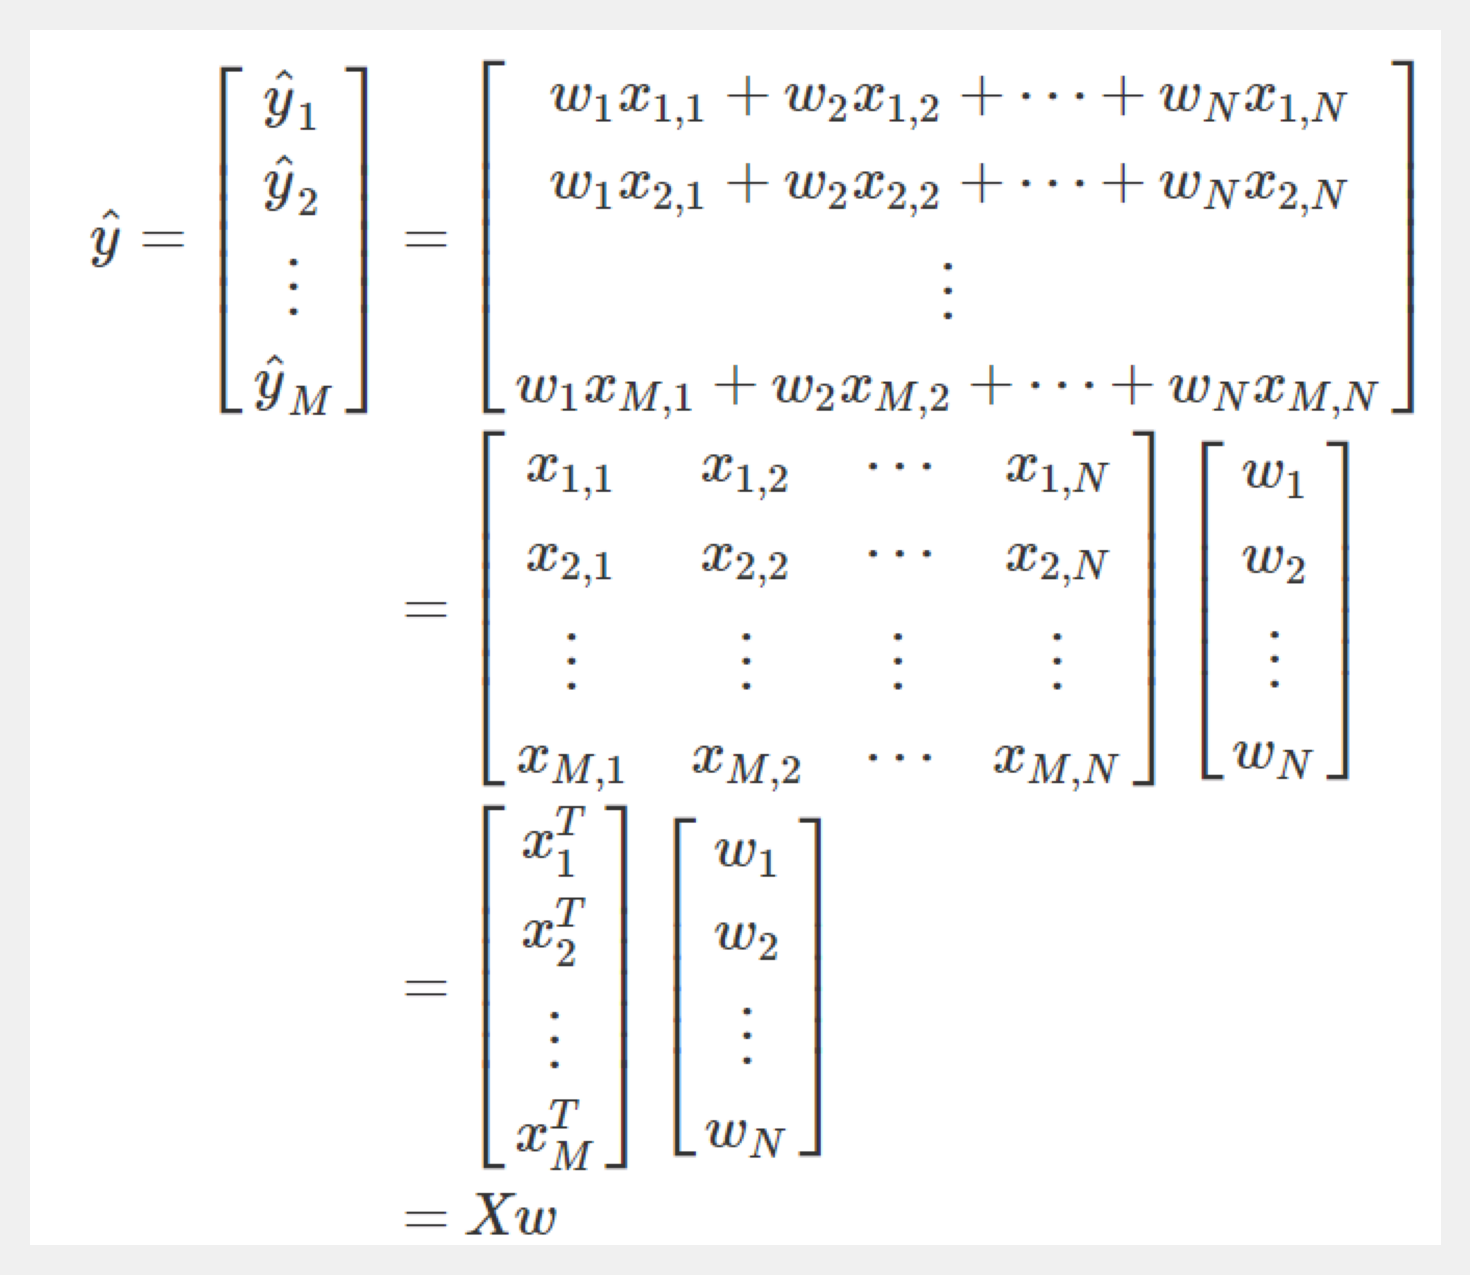

In [167]:
lena = mpimg.imread('./여러 개의 벡터에 대한 가중합 동시 계산.png')
lena.shape
plt.imshow(lena) # 사진 출력
plt.axis('off') # 좌표 안 나오게 설정
plt.show()

## 잔차
- 예측치와 실젯값(target)  yi 의 차이를 오차(error) 혹은 잔차(residual)  ei 라고 한다. 이러한 잔찻값을 모든 독립변수 벡터에 대해 구하면 잔차 벡터  e 가 된다.
    - ei=yi−^yi=yi−w^Txi
- 잔차 벡터는 다음처럼  y−Xw 로 간단하게 표기할 수 있다.

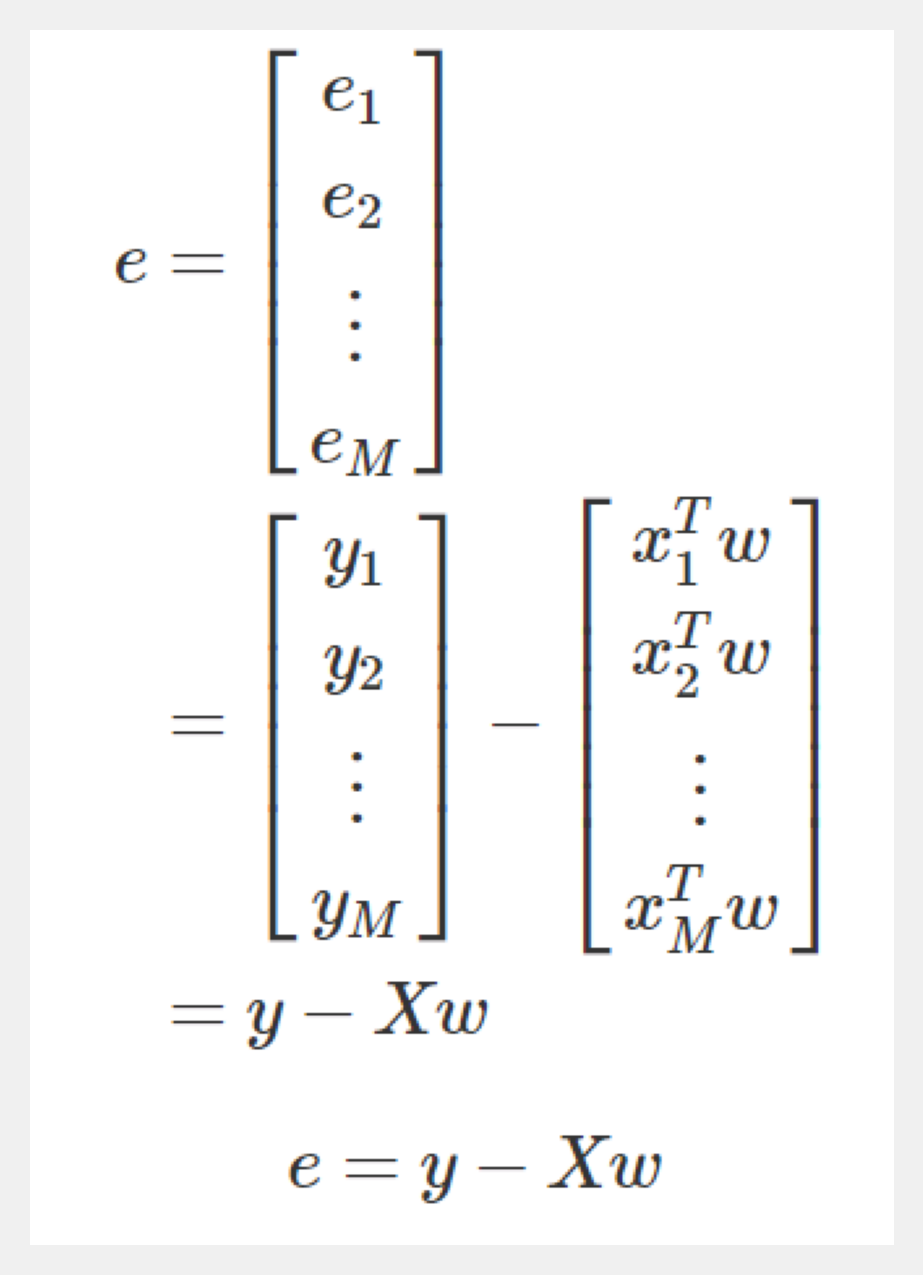

In [169]:
lena = mpimg.imread('./erro.png')
lena.shape
plt.imshow(lena) # 사진 출력
plt.axis('off') # 좌표 안 나오게 설정
plt.show()

## 잔차 제곱합(RSS: Residual Sum of Squares)
- 플러스과 마이너스 만날 때 오차 없어질 수도 있어서 제곱을 사용하면 오차를 유지할 수 있음

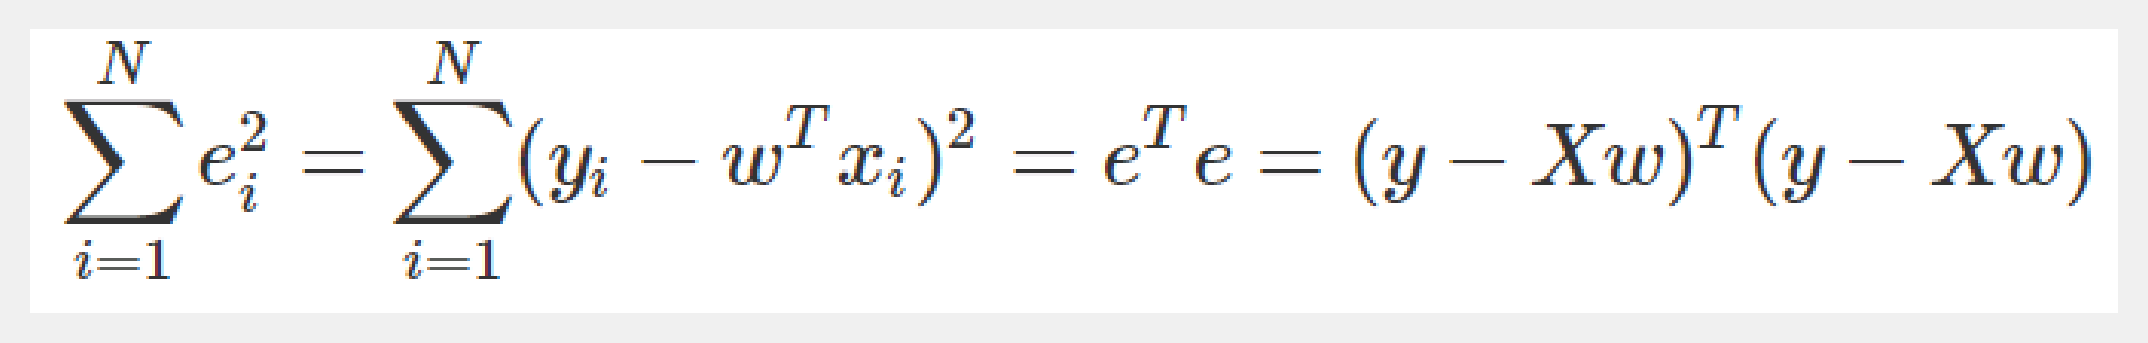

In [170]:
lena = mpimg.imread('./Residual Sum of Squares.png')
lena.shape
plt.imshow(lena) # 사진 출력
plt.axis('off') # 좌표 안 나오게 설정
plt.show()

연습 문제 2.2.10:

분배 법칙을 사용하여 위 식  (y−Xw)^T(y−Xw) 을 풀어쓰면 다음과 같아짐을 보여라.

(y−Xw)^T(y−Xw)=y^Ty−w^TX^Ty−y^TXw+w^TX^TXw

## 이차형식(Quadratic Form)
w^TX^TXw 이 식에서  X^TX 는 정방행렬이 되므로 이 정방행렬을  A 라고 이름 붙이면 마지막 항은  w^TAw 와 같은 형태가 된다.

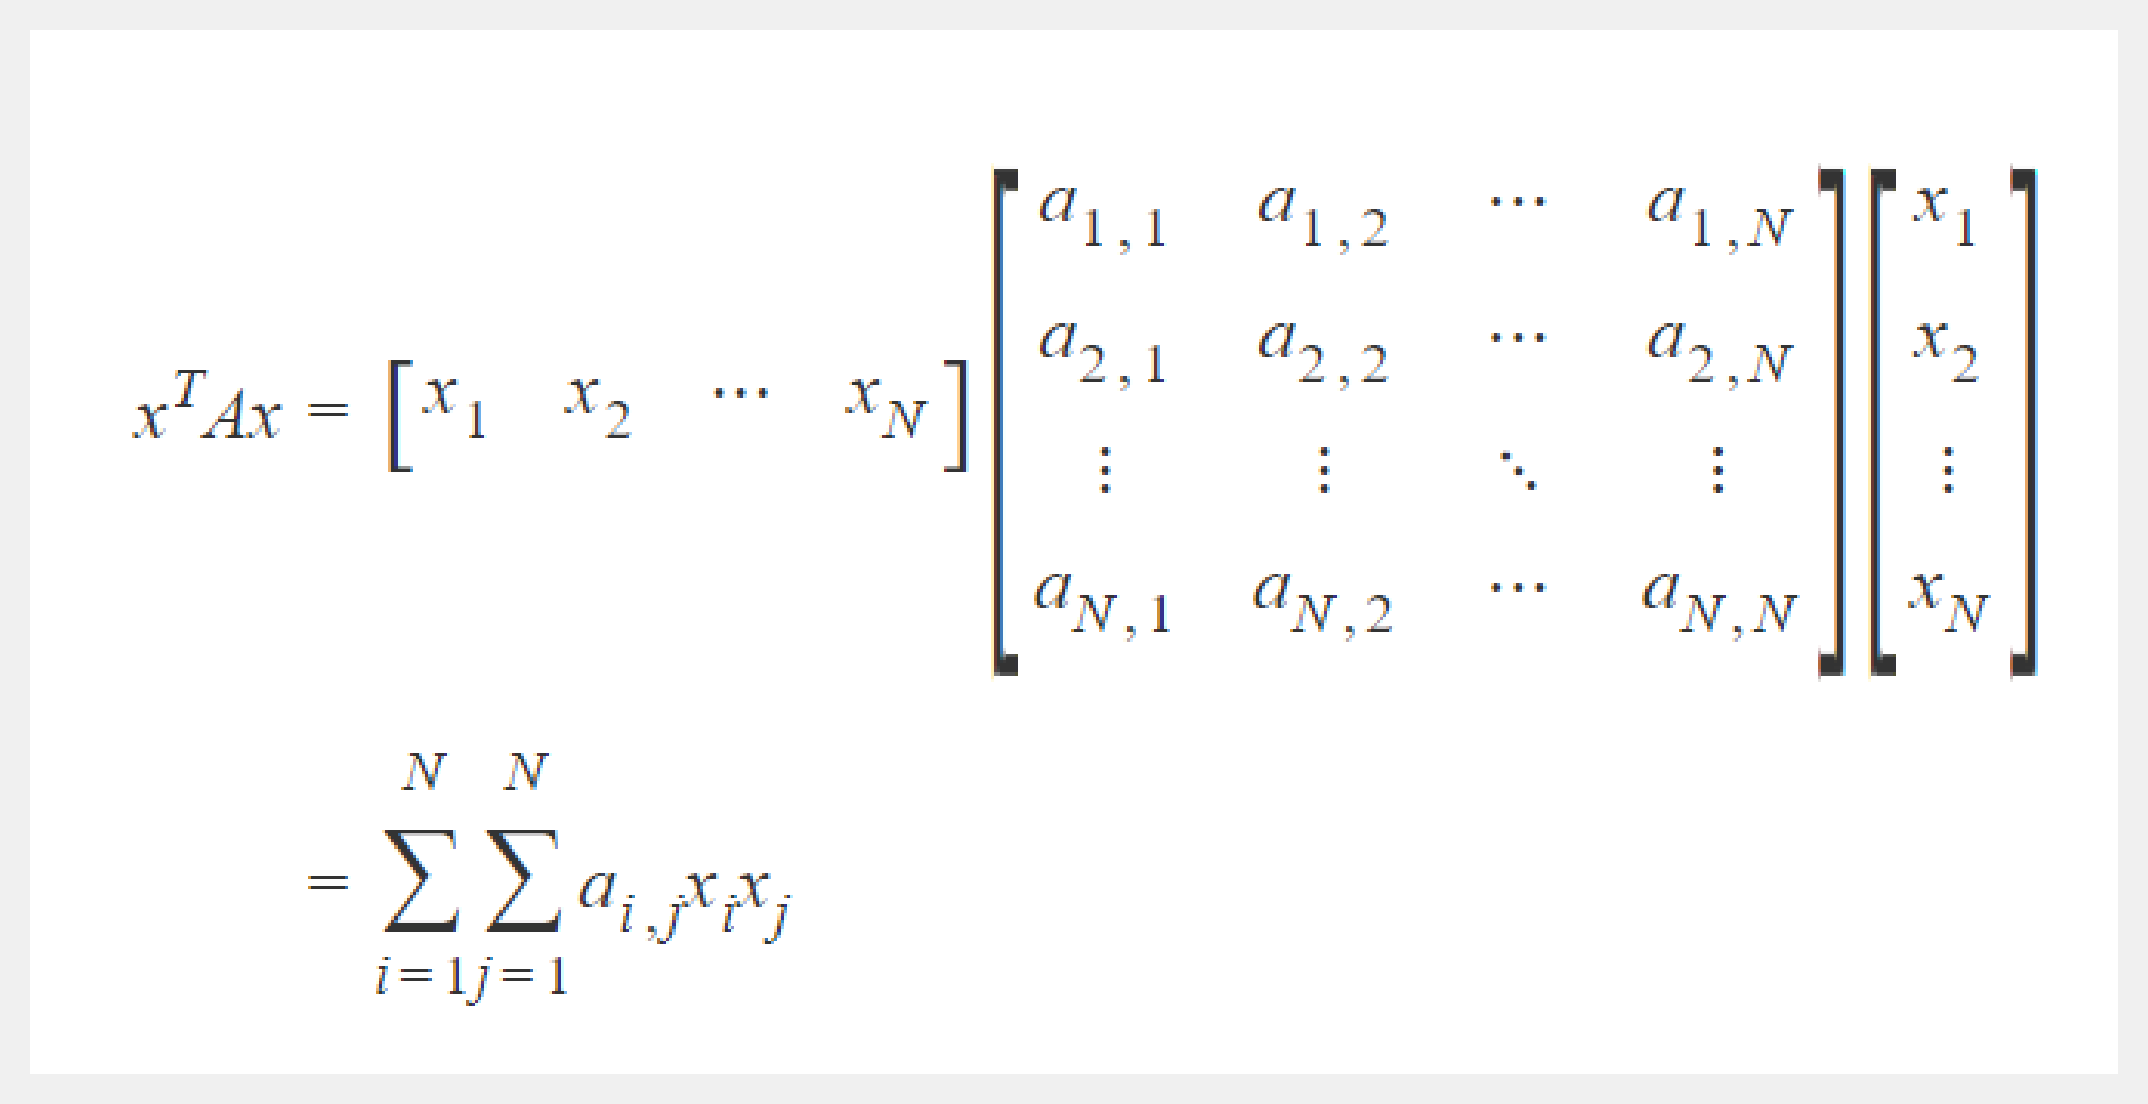

In [171]:

lena = mpimg.imread('./이차형식.png')
lena.shape
plt.imshow(lena) # 사진 출력
plt.axis('off') # 좌표 안 나오게 설정
plt.show()

In [172]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [173]:
A = np.arange(1, 10).reshape(3, 3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [174]:
x.T @ A @ x

228

In [175]:
x.T@A@x/2

114.0

In [176]:
x.T@A.T@x/2

114.0

## 부분행렬
- 1.행벡터x행렬

- 2.행렬x열벡터

- 3.열벡터x행벡터